In [0]:
#pulling HTML data from web
#from urllib.request import urlopen,Request
#url = 'https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv'
#request = Request(url)
#response = urlopen(request)
#csv = response.read()

In [0]:
#import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv')

In [101]:
data.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


Text(0, 0.5, 'Flights')

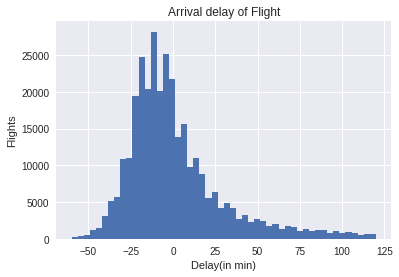

In [102]:
plt.hist(data['arr_delay'],bins = 50);
plt.title('Arrival delay of Flight')
plt.xlabel('Delay(in min)')
plt.ylabel('Flights')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


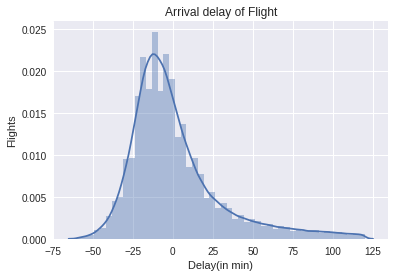

In [103]:
sns.distplot(data['arr_delay'],hist = True,norm_hist = True);
plt.title('Arrival delay of Flight');
plt.xlabel('Delay(in min)');
plt.ylabel('Flights');

In [104]:
data['name'].value_counts()

United Air Lines Inc.          56359
JetBlue Airways                52267
ExpressJet Airlines Inc.       48641
Delta Air Lines Inc.           46468
American Airlines Inc.         31197
Envoy Air                      24327
US Airways Inc.                19547
Endeavor Air Inc.              16578
Southwest Airlines Co.         11588
Virgin America                  4920
AirTran Airways Corporation     3021
Alaska Airlines Inc.             689
Frontier Airlines Inc.           639
Mesa Airlines Inc.               513
Hawaiian Airlines Inc.           332
SkyWest Airlines Inc.             27
Name: name, dtype: int64

In [0]:
#Make a seperate list of each Airline

x1 = list(data[data['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(data[data['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(data[data['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(data[data['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(data[data['name'] == 'American Airlines Inc.']['arr_delay'])
#x6 = list(data[data['name'] == 'Envoy Air']['arr_delay'])
#x7 = list(data[data['name'] == 'US Airways Inc.']['arr_delay'])
#x8 = list(data[data['name'] == 'Endeavor Air Inc.']['arr_delay'])
#x9 = list(data[data['name'] == 'Southwest Airlines Co.']['arr_delay'])
#x10 = list(data[data['name'] == 'Virgin America']['arr_delay'])
#x11 = list(data[data['name'] == 'AirTran Airways Corporation']['arr_delay'])
#x12 = list(data[data['name'] == 'Alaska Airlines Inc.']['arr_delay'])

In [0]:
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00',]
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


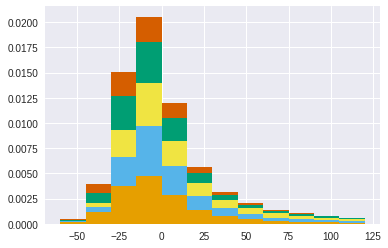

In [107]:
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names);

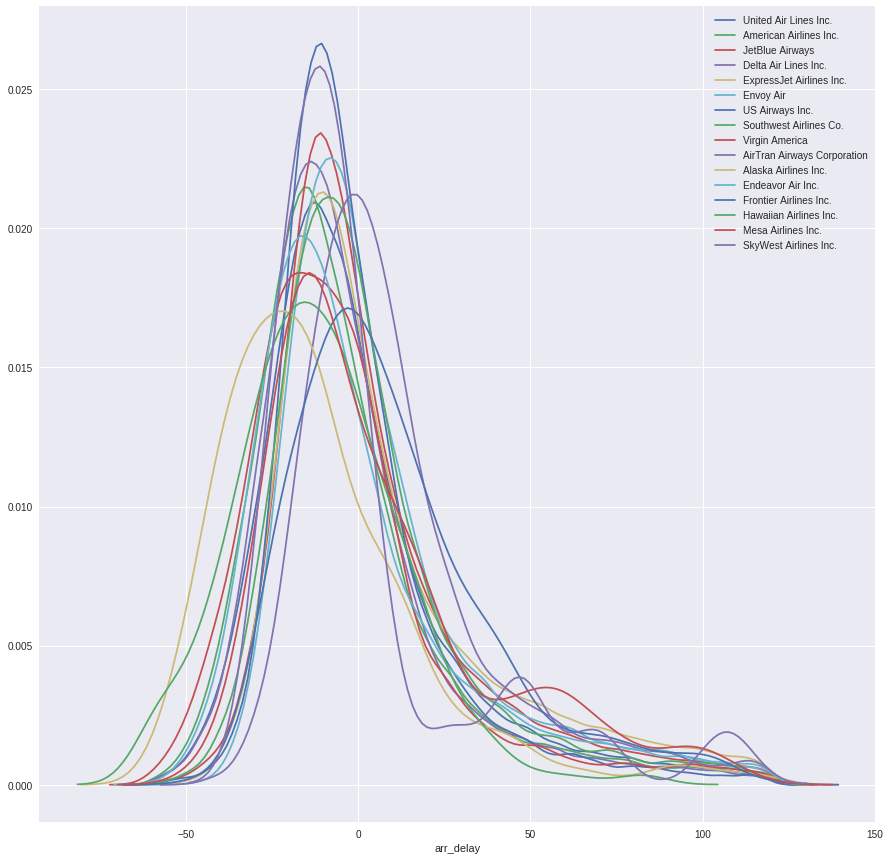

In [108]:
ax, fig = plt.subplots(figsize=(15,15))
for flight in data.name.unique():
    sns.distplot(data[data.name == flight].arr_delay,kde=True, hist=False,label=flight)
# sns.legend()

**Part 1 : **here Alaska Airline would be the best option left due to early Arrival.

**Part 2**
now the test for the central limit theorem the 4 things are:

1 The sampling dist of the mean will be less spread than the values in the population from which the sample is drawn

2 The sampling dist will be well-modeled by a normal dist.

3 The spread of the sampling dist. is related to the spread of the population values $\mu_{sampling} = \mu_{population}$, $\sigma_{sampling} = \frac{\sigma_{population}}{ \sqrt{n}}$

4 Bigger samples lead to a smaller spread in the sampling dist

In [0]:
#First create different samples from the Population having n samples and m number of variables

def sample(data,n:int,m:int):
  samples = []
  for i in range(n):
    samples.append(data.sample(m))
  return samples

n = 200
m = 300
samples = sample(data,n,m)
mean = [np.mean(x['arr_delay']) for x in samples]
std = [np.std(x['arr_delay']) for x in samples]

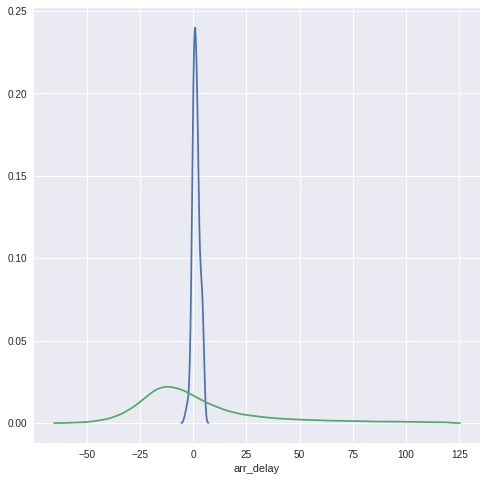

In [110]:
#1 Sampling dist of mean will be less spread than population

ax,fig = plt.subplots(figsize = (8,8))
sns.distplot(mean, kde = True,hist = False)
sns.distplot(data['arr_delay'],kde = True,hist = False)

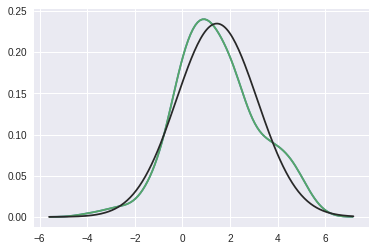

In [111]:
#2 The sampling dist will be well-modeled by a normal dist.

from scipy.stats import norm
sns.distplot(mean,hist=False)
sns.distplot(mean,hist=False,fit=norm)

In [0]:
#4

samples_mean = []
samples_std = []
j = 0
itr = 0
while itr < 100:
  j += 1
  sample = data.arr_delay.sample(n=1000, random_state=j)
  sample_mean = sample.mean()
  sample_std = sample.std()
  samples_mean.append(sample_mean)
  samples_std.append(sample_std)
  itr += 1

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


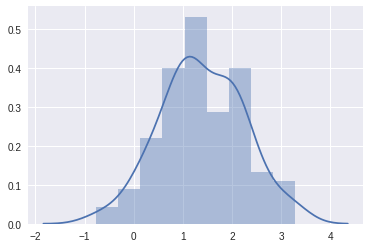

In [115]:
sns.distplot(samples_mean,kde = True);

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


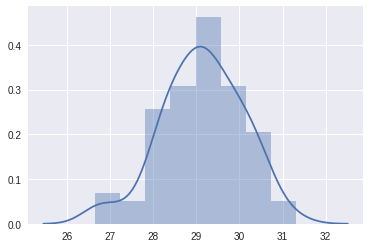

In [117]:
sns.distplot(samples_std,kde = True);

In [0]:
samples_mean = []
samples_std = []
j = 0
itr = 0
while itr < 1000:
  j += 1
  sample = data.arr_delay.sample(n=1000, random_state=j)
  sample_mean = sample.mean()
  sample_std = sample.std()
  samples_mean.append(sample_mean)
  samples_std.append(sample_std)
  itr += 1

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


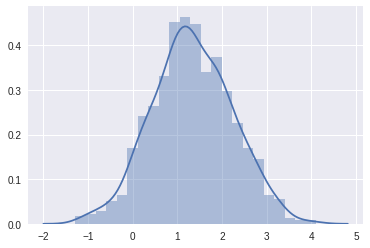

In [119]:
sns.distplot(samples_mean,kde = True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


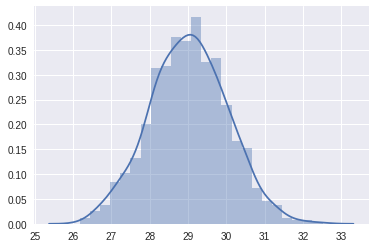

In [121]:
sns.distplot(samples_std,kde = True)

**4th :** After increasing sample size from** 100 to 1000 : ** then the mean distribution tend to Normalize** **

**Note : ** To study more About Central Limit Theorem visit Khan Academy.